In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [18]:
data=pd.read_csv("/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv")

In [20]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [21]:
data.shape

(2416, 7)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


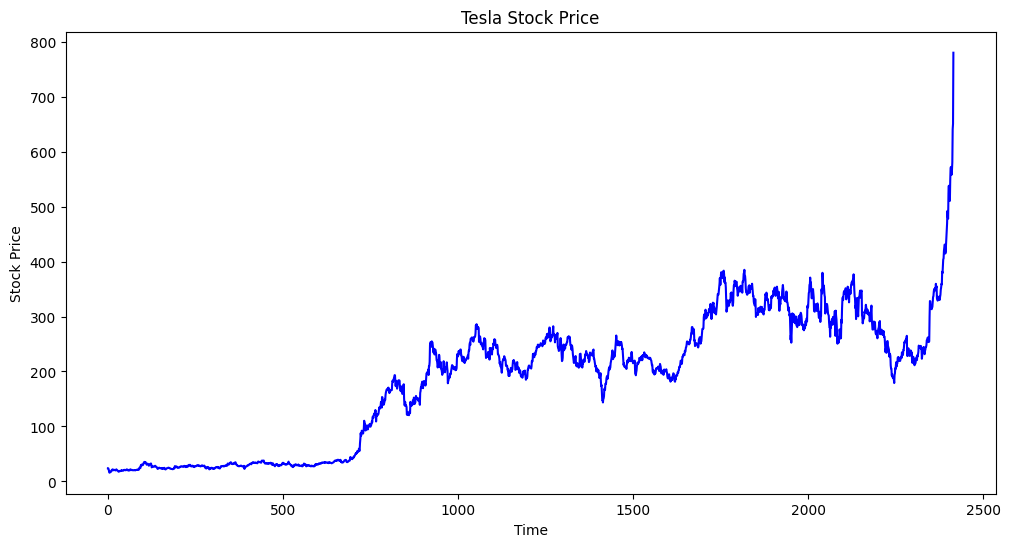

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [50]:
data = data.drop(['Adj Close'], axis=1)

In [52]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [54]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Split the date into day, month, and year columns
data['day'] = data['Date'].dt.day.astype('int')
data['month'] = data['Date'].dt.month.astype('int')
data['year'] = data['Date'].dt.year.astype('int')

data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [55]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [56]:
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

In [63]:
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


In [62]:
x = data[['open-close', 'low-high', 'is_quarter_end']]
y = data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(x)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
XGB = XGBClassifier()
 
XGB.fit(X_train, Y_train)

pred= XGB.predict(X_valid)

accuracy_test = accuracy_score(Y_valid, pred)
print(f'Test Accuracy: {accuracy_test}')

Test Accuracy: 0.5165289256198347
